In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_columns',20)
#pd.set_option('display.max_rows',100)
plt.style.use('ggplot')

In [2]:
df = pd.read_excel('Mod_Clothing Cleaned.xlsx')
df.head()

,item_id,size,quality,cup_size,hips,bra_size,category,Height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,7,5,d,38,34,new,5.50,Emily,just right,small,991571,8.5,NaN,NaN,NaN
1,123373,13,3,b,30,36,new,5.17,sydneybraden2001,just right,small,587883,9.5,NaN,NaN,NaN
2,123373,7,2,b,39,32,new,5.58,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,21,5,dd/e,39,36,new,5.42,alexmeyer626,just right,fit,875643,10.0,NaN,NaN,NaN
4,123373,18,5,b,39,36,new,5.17,dberrones1,slightly long,small,944840,8.5,NaN,NaN,NaN


### 1. Test the claim that the category feature and review summary have any relationship among them. The level of significance is 5%.

#### We will be using Chi-Square Test for Independence to find if there's any relationship between the features.

#### Null and Alternate Hypotheses :-
> $H_0$ : 'Category' and 'Review Summary' are independent of each other.

> $H_a$ : 'Category' and 'Review Summary' are dependent of each other.

#### We will downsize the reviews summary by taking Top 10 review summaries for each category so that the contingency table is not big (Dimensionality Reduction)

In [3]:
top10_review_summaries = []
for i in df['category'].unique():
    for j in range(10):
        top10_review_summaries.append(df[df['category'] == i]['review_summary'].value_counts().head(10).index[j])

# Removing Duplicates from list
top10_review_summaries = list(set(top10_review_summaries))
#print(top10_review_summaries)

In [4]:
df1 = df[df['review_summary'].isin(top10_review_summaries)]
df1.shape

(1860, 16)

In [5]:
contingency_table = pd.crosstab(df1['category'], df1['review_summary'])
contingency_table

review_summary,.,Another good piece from r,Cute,I LOVE this dress. I'm tr,I absolutely love this ca,I absolutely love this co,I absolutely love this dr,I absolutely love this ja,I absolutely love this sk,I am in love with this co,...,Love!,OMG! I had been wanting t,One of my favorite shirts,Perfect!,This dress is absolutely,This dress is beautiful.,This is a beautiful dress,This is one of my favorit,This skirt is absolutely,This was a nice dress bea
category,,,,,,,,,,,,,,,,,,,,,
bottoms,24,0,3,0,0,0,0,0,39,0,...,11,0,0,15,0,0,0,8,21,0
dresses,10,0,5,0,0,0,104,0,0,0,...,7,0,0,12,43,12,21,27,0,0
new,20,0,4,0,13,7,9,4,4,1,...,11,0,3,14,1,1,4,17,1,0
outerwear,6,0,0,0,0,25,0,6,0,7,...,0,0,0,2,0,0,1,1,0,0
sale,0,0,4,0,0,0,10,0,0,1,...,4,0,0,5,2,1,5,0,0,0
tops,16,0,8,0,11,1,0,0,0,1,...,24,0,18,21,0,0,0,30,0,0
wedding,0,1,0,1,0,0,1,0,0,0,...,0,1,0,0,1,2,1,0,0,1


In [6]:
from scipy.stats import chi2_contingency

chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('Test Statistic:',chi)
print('P-value:',p_value)

Test Statistic: 3049.195323903264
P-value: 0.0


#### As the p-value is much less than the significance level, we can reject the $H_0$. Hence, we have enough statistical evidence to say that category feature and review summary have a relationship at 5% significance level.

---

### 2. Test statistically whether the size and hips have any relationship using 0.05 alpha. Before the above test, Test the normality test.

#### Normality Test for 'size' and 'hips' columns :-

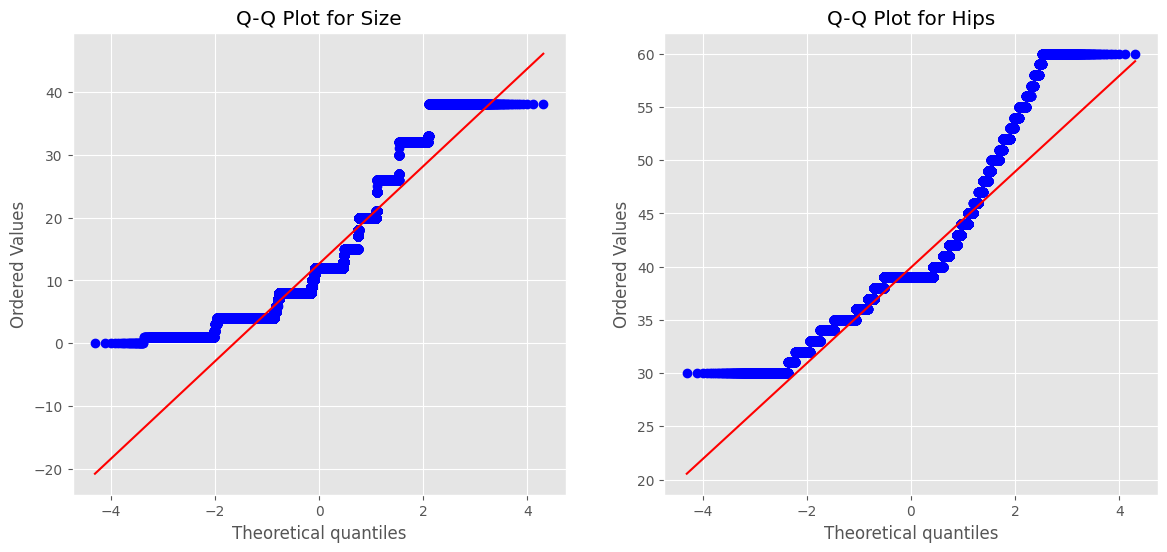

Shapiro-Wilk test p-value for 'size': 0.0
Shapiro-Wilk test p-value for 'hips': 0.0
The 'size' data does not follow a normal distribution.
The 'hips' data does not follow a normal distribution.


In [7]:
from scipy.stats import probplot,shapiro 
# Q-Q plot
# Quantilte-Quantile Plot is plot between theoretical quantiles and quantiles of sample data. 
# If plot is straight line then we can conclude that sample is Normal.
fig,ax = plt.subplots(1,2,figsize=(14,6))
qq1 = probplot(df['size'], dist="norm", plot=ax[0])
qq2 = probplot(df['hips'], dist="norm", plot=ax[1])
ax[0].set_title('Q-Q Plot for Size')
ax[1].set_title('Q-Q Plot for Hips')
plt.show()

# Shapiro-Wilk test for normality
stat1, p_value1 = shapiro(df['size'])
stat2, p_value2 = shapiro(df['hips'])

# Check the p-value
alpha = 0.05  # 95% confidence level
print(f"Shapiro-Wilk test p-value for 'size': {p_value1}")
print(f"Shapiro-Wilk test p-value for 'hips': {p_value2}")

if p_value1 < alpha:
    print("The 'size' data does not follow a normal distribution.")
else:
    print("The 'size' data follows a normal distribution.")

if p_value2 < alpha:
    print("The 'hips' data does not follow a normal distribution.")
else:
    print("The 'hips' data follows a normal distribution.")

#### Both have failed the Normality Test. Acknowledging the fact that real life data don't always actually follow Normality, proceeding to the test.

In [8]:
df[['hips','size']].corr()

,hips,size
hips,1.000000,0.589042
size,0.589042,1.000000


#### There is 0.58 Pearson's Correlation between the features.

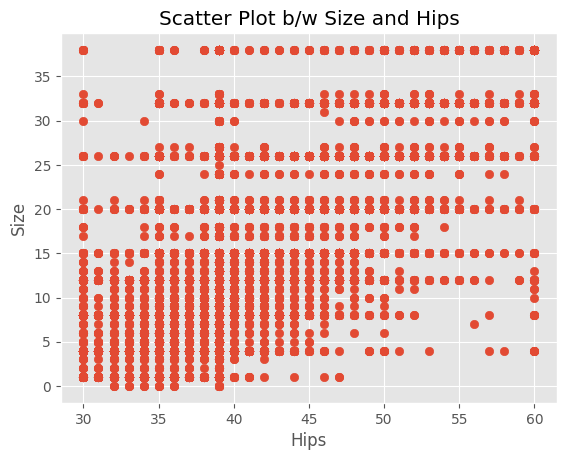

In [9]:
# Plotting a scatter plot to see if there's linear relationship between the features
plt.scatter(x=df['hips'], y=df['size'])
plt.xlabel('Hips')
plt.ylabel('Size')
plt.title('Scatter Plot b/w Size and Hips')
plt.show()


#### There doesn't seem to be a linear relationship between the features.

#### In this case we can make use of 2 tests.

### a. Spearman Rank-Order Correlation Test:
> $H_0$ : There is no significant monotonic relationship between the two variables.

> $H_a$ : There is a significant monotonic relationship between the two variables.

##### Purpose: Tests the monotonic relationship between two continuous or ordinal variables

In [10]:
from scipy.stats import spearmanr

correlation_coefficient, p_value = spearmanr(df['size'], df['hips'])
print('P-value from Spearman Rank-Order Correlation Test:',p_value)

P-value from Spearman Rank-Order Correlation Test: 0.0


### b. Kendall's Tau Test:
> $H_0$ : There is no significant monotonic relationship between the two variables.

> $H_a$ : There is a significant monotonic relationship between the two variables.

##### Purpose: Tests the strength and direction of a monotonic relationship between two continuous or ordinal variables.

In [11]:
from scipy.stats import kendalltau

correlation_coefficient, p_value = kendalltau(df['size'], df['hips'])
print("P-value from Kendall's Tau Test:",p_value)

P-value from Kendall's Tau Test: 0.0


#### Both the tests yielded a significantly less p-value, hence we can reject $H_0$. That means there is enough statistical evidence to say that there is a 'monotonic' relationship between the 'size' and 'hips' columns.

---

### 3. Does the quality significantly differ for any one shoe width? Test the test with 96% confidence interval.

#### We can perform Multiple Comparison test (Tukey HSD) test for this. One way ANOVA can also be done.

#### Let $\mu_1, \mu_2, \mu_3$ be the means of quality for each shoe width. 

#### Null and Alternate Hypotheses :-
> $H_0 : \mu_{1}=\mu_{2} \text{ }\text{and}\text{ } \mu_{2}=\mu_{3} \text{ }\text{and}\text{ } \mu_{3}=\mu_{1}$

> $H_a : \mu_{1}\neq\mu_{2} \text{ }\text{or}\text{ } \mu_{2}\neq\mu_{3} \text{ }\text{or}\text{ } \mu_{3}\neq\mu_{1}$

In [12]:
# Removing the records which have missing values in 'Shoe width' column
df2 = df.dropna(subset=['shoe_width'])
df2['shoe_width'].isna().sum()

0

In [13]:
df2.groupby('shoe_width')['quality'].mean()

shoe_width
average    4.002993
narrow     4.003232
wide       3.947262
Name: quality, dtype: float64

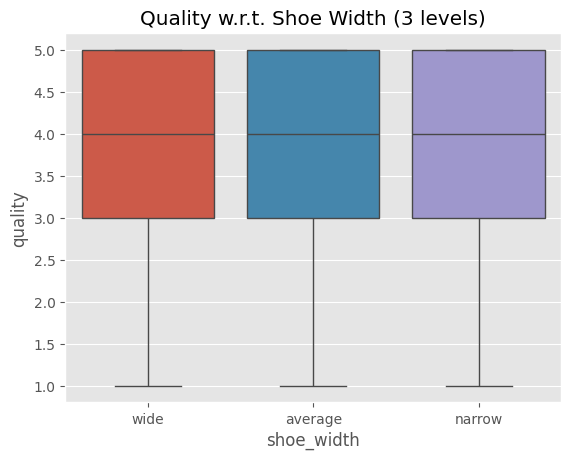

In [14]:
sns.boxplot(df2, x='shoe_width', y='quality', hue='shoe_width')
plt.title('Quality w.r.t. Shoe Width (3 levels)')
plt.show()

#### Means for samples look almost the same. Let's perform the test

In [15]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = df2['quality'], groups = df2['shoe_width'], alpha = 0.04)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.04 
 group1 group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
average narrow   0.0002    1.0 -0.0642  0.0646  False
average   wide  -0.0557 0.0053 -0.0992 -0.0122   True
 narrow   wide   -0.056 0.1404 -0.1278  0.0159  False
-----------------------------------------------------


#### We can conclude that mean quality in case of shoe widths 'average' and 'wide' is significantly different whereas in other 2 combinations mean quality is almost significantly same. 

---

### 4. Check if the shoe width feature affects the review summary with a 99% confidence interval.

#### We will be using Chi-Square Test for Independence to find if there's any relationship between the features.

#### Null and Alternate Hypotheses :-
> $H_0$ : 'shoe_width' and 'Review Summary' are independent of each other.

> $H_a$ : 'shoe_width' and 'Review Summary' are dependent of each other.

#### We will downsize the reviews summary by taking Top 10 review summaries for each shoe width so that the contingency table is not big (Dimensionality Reduction)

In [16]:
# Removing Missing records from columns
df3 = df.dropna(subset=['shoe_width','review_summary'])

In [17]:
top10_review_summaries = []
for i in df3['shoe_width'].unique():
    for j in range(10):
        top10_review_summaries.append(df3[df3['shoe_width'] == i]['review_summary'].value_counts().head(10).index[j])

# Removing Duplicates from list
top10_review_summaries = list(set(top10_review_summaries))
# print(top10_review_summaries)

In [18]:
df4 = df3[df3['review_summary'].isin(top10_review_summaries)]
df4.shape

(251, 16)

In [19]:
contingency_table = pd.crosstab(df4['shoe_width'], df4['review_summary'])
contingency_table

review_summary,.,Great!,I LOVE this dress! It is,I absolutely LOVE this dr,I absolutely adore this d,I absolutely love this dr,I absolutely love this sh,I bought this dress for m,I don't think of this as,I get so many compliments,...,I wanted to love this dre,I'm only a few cardis awa,Love,Love it,Love it!,Love this dress!,My favorite cardigan! It,Perfect as usual,This dress is perfect. Th,This is one of my favorit
shoe_width,,,,,,,,,,,,,,,,,,,,,
average,9,0,0,2,2,12,2,9,0,6,...,6,0,9,5,20,10,0,0,0,17
narrow,0,3,3,1,2,2,2,0,2,0,...,2,0,1,0,4,0,2,2,2,0
wide,0,0,0,4,0,5,1,2,0,8,...,4,4,2,5,9,2,0,0,0,2


In [20]:
chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('Test Statistic:',chi)
print('P-value:',p_value)

Test Statistic: 167.21140727681504
P-value: 4.232151371127892e-15


#### Even for significance level of 1%, P-value is too small hence we can reject $H_0$. That means there is enough statistical evidence to conclude that 'shoe_width' and 'review_summary' features have a relation with each other.

---

### 5. Check if the length feature affects the review summary with a 95% confidence interval.

#### We will be using Chi-Square Test for Independence to find if there's any relationship between the features.

#### Null and Alternate Hypotheses :-
> $H_0$ : 'Length' and 'Review Summary' are independent of each other.

> $H_a$ : 'Length' and 'Review Summary' are dependent of each other.

#### We will downsize the reviews summary by taking Top 10 review summaries for each length so that the contingency table is not big (Dimensionality Reduction)

In [21]:
# Removing Missing records from columns
df5 = df.dropna(subset=['review_summary'])

In [22]:
top10_review_summaries = []
for i in df3['length'].unique():
    for j in range(10):
        top10_review_summaries.append(df3[df3['length'] == i]['review_summary'].value_counts().head(10).index[j])

# Removing Dulpicates from list
top10_review_summaries = list(set(top10_review_summaries))
# print(top10_review_summaries)

In [23]:
df6 = df5[df5['review_summary'].isin(top10_review_summaries)]
df6.shape

(1115, 16)

In [24]:
contingency_table = pd.crosstab(df6['length'], df6['review_summary'])
contingency_table

review_summary,#Review ContestAlthough t,Ehhhh...,Had to send it back. Supe,I absolutely love this dr,I absolutely love this sk,I absolutely love this ta,I am short so it's a litt,I don't know what all the,I get so many compliments,I just do not understand,...,Perfect!,Size is a joke,Style is very cute. I fel,The material of this dres,These pants are really cu,This is a great basic car,This is one of my favorit,Very long on my 5'2 frame,"Very short inseam, built for pear shapes","Zoiks! Very weird fit, ki"
length,,,,,,,,,,,,,,,,,,,,,
just right,0,0,0,105,32,0,0,0,64,0,...,64,0,0,5,0,0,69,0,0,0
slightly long,0,0,0,6,10,3,3,0,1,0,...,3,0,0,2,1,0,8,0,0,0
slightly short,0,0,0,10,1,0,0,2,4,0,...,1,0,0,3,0,2,4,0,0,0
very long,1,0,0,1,0,0,0,0,2,2,...,1,0,0,0,0,0,1,2,0,0
very short,0,1,1,2,0,0,0,0,0,0,...,0,1,1,1,1,0,1,0,1,1


In [25]:
chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('Test Statistic:',chi)
print('P-value:',p_value)

Test Statistic: 1091.7205017728893
P-value: 1.6269214122299915e-133


#### As P-value is way less than 5% significance level, we can reject $H_0$. That means there is enough statistical evidence to claim that 'length' and 'review_summary' have a relation with each other. 

---

### 6. Does the average quality significantly differ for the different fits? Kindly test the relevant hypothesis test by having 0.05 alpha. Check the normality of the data before the above test. Alpha = 0.05

#### We can perform Multiple Comparison test (Tukey HSD) test for this

#### Let $\mu_1, \mu_2, \mu_3$ be the means of quality for each fit.

#### Null and Alternate Hypotheses :-
> $H_0 : \mu_{1}=\mu_{2} \text{ }\text{and}\text{ } \mu_{2}=\mu_{3} \text{ }\text{and}\text{ } \mu_{3}=\mu_{1}$

> $H_a : \mu_{1}\neq\mu_{2} \text{ }\text{or}\text{ } \mu_{2}\neq\mu_{3} \text{ }\text{or}\text{ } \mu_{3}\neq\mu_{1}$

#### Performing Normality Test on 'quality' column: 

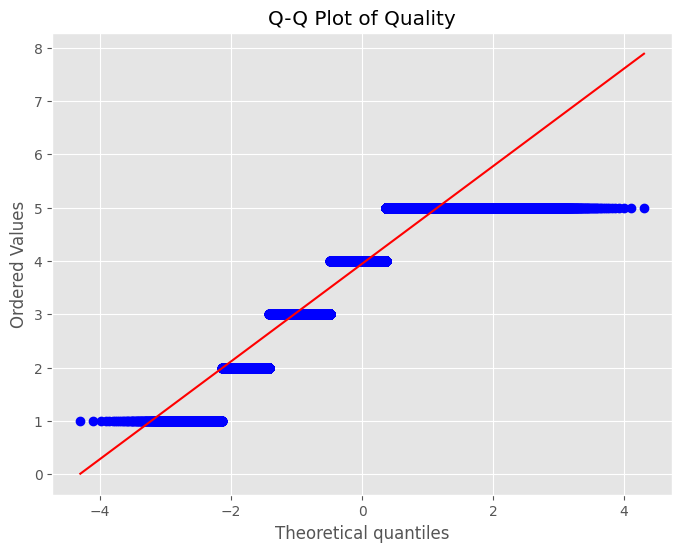

Shapiro-Wilk test p-value: 0.0
The data does not follow a normal distribution.


In [26]:
plt.figure(figsize=(8, 6))
probplot(df['quality'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Quality")
plt.show()

# Shapiro-Wilk test for normality
stat, p_value = shapiro(df['quality'])

alpha = 0.05
print(f"Shapiro-Wilk test p-value: {p_value}")

if p_value < alpha:
    print("The data does not follow a normal distribution.")
else:
    print("The data follows a normal distribution.")

#### Data doesn't follow Normal Distribution. But let's proceed...

In [27]:
df.groupby('fit')['quality'].mean()

fit
fit      4.083058
large    3.828640
small    3.483761
Name: quality, dtype: float64

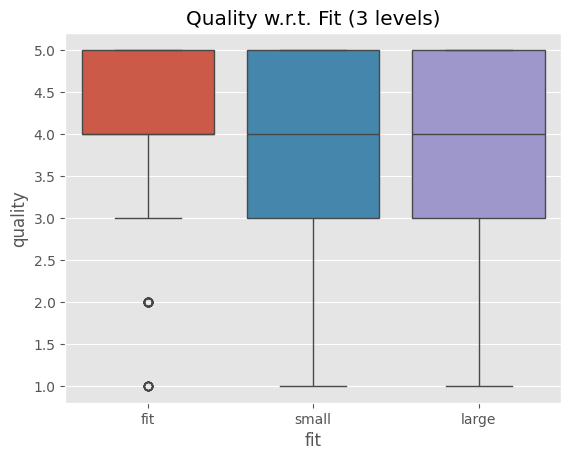

In [28]:
sns.boxplot(df1, x='fit', y='quality', hue='fit')
plt.title('Quality w.r.t. Fit (3 levels)')
plt.show()

#### Means for samples look close but not almost same. Let's perform the test

In [29]:
m_comp = pairwise_tukeyhsd(endog = df['quality'], groups = df['fit'], alpha = 0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   fit  large  -0.2544   0.0 -0.2765 -0.2324   True
   fit  small  -0.5993   0.0 -0.6214 -0.5772   True
 large  small  -0.3449   0.0 -0.3731 -0.3167   True
---------------------------------------------------


#### This means that the average quality for each fit is different from the other. 